<a href="https://colab.research.google.com/github/wjsrlzhem/BBangBro_clone/blob/main/%EC%9B%B9%ED%81%AC%EB%A1%A4%EB%A7%81%2B%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C%2B%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Apr 13 07:26:57 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    30W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install -q -U sentence-transformers

     |████████████████████████████████| 79 kB 3.5 MB/s 
     |████████████████████████████████| 4.0 MB 31.6 MB/s 
     |████████████████████████████████| 1.2 MB 48.8 MB/s 
     |████████████████████████████████| 77 kB 5.5 MB/s 
     |████████████████████████████████| 596 kB 48.6 MB/s 
     |████████████████████████████████| 6.5 MB 44.0 MB/s 
     |████████████████████████████████| 895 kB 61.1 MB/s 


In [3]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('jhgan/ko-sroberta-multitask')

sentences = ['안녕하세요','한국어 문장 임베딩을 위한 버트 모델입니다.']
embeddings = model.encode(sentences)

print(embeddings)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.86k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/744 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/123 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/931 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/443M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/302 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/156 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/495k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/585 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/248k [00:00<?, ?B/s]

[[-0.17859313 -0.5612939   0.44627675 ...  0.5000261   0.43289608
  -0.7486531 ]
 [-0.09361678 -0.18191536 -0.1923084  ... -0.03165808  0.3041253
  -0.26793623]]


In [4]:
from sklearn.cluster import KMeans

sentences = ['한 남자가 음식을 먹는다.',
          '한 남자가 빵 한 조각을 먹는다.',
          '그 여자가 아이를 돌본다.',
          '한 남자가 말을 탄다.',
          '한 여자가 바이올린을 연주한다.',
          '두 남자가 수레를 숲 속으로 밀었다.',
          '한 남자가 담으로 싸인 땅에서 백마를 타고 있다.',
          '원숭이 한 마리가 드럼을 연주한다.',
          '치타 한 마리가 먹이 뒤에서 달리고 있다.',
          '한 남자가 파스타를 먹는다.',
          '고릴라 의상을 입은 누군가가 드럼을 연주하고 있다.',
          '치타가 들판을 가로 질러 먹이를 쫓는다.']


embeddings = model.encode(sentences)


num_clustrs = 4

clustering_model = KMeans(n_clusters=num_clustrs)
clustering_model.fit(embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clustrs)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
  clustered_sentences[cluster_id].append(sentences[sentence_id])

for i , cluster in enumerate(clustered_sentences):
  print('Cluster ',i+1)
  print(cluster)
  print()

Cluster  1
['그 여자가 아이를 돌본다.', '한 여자가 바이올린을 연주한다.', '원숭이 한 마리가 드럼을 연주한다.', '고릴라 의상을 입은 누군가가 드럼을 연주하고 있다.']

Cluster  2
['한 남자가 음식을 먹는다.', '한 남자가 빵 한 조각을 먹는다.', '한 남자가 파스타를 먹는다.']

Cluster  3
['한 남자가 말을 탄다.', '두 남자가 수레를 숲 속으로 밀었다.', '한 남자가 담으로 싸인 땅에서 백마를 타고 있다.']

Cluster  4
['치타 한 마리가 먹이 뒤에서 달리고 있다.', '치타가 들판을 가로 질러 먹이를 쫓는다.']



In [5]:
import requests
import time

In [6]:
def get_reviews(appid,params={'json':1}):
  url = 'https://store.steampowered.com/appreviews/'
  response = requests.get(url=url+str(appid), params=params, headers = {'User-Agent' :'Mozilla/5.0'})
  return response.json()

def get_n_reviews(appid,n = 100):
  reviews = []
  cursor = '*'
  params = {
      'json' : 1 ,
      'filter' : 'all',
      'language' : 'koreana',
      'day_range' : 9223372036854775807,
      'review_type' : 'all',
      'purchase_type' : 'all'
  }

  while n > 0:
    time.sleep(2)
    params['cursor'] = cursor.encode()
    params['num_per_page'] = min(100,n)
    n -= 100

    response = get_reviews(appid,params)
    cursor = response['cursor']
    reviews += response['reviews']

    if len(response['reviews']) < 100:break

  return reviews

In [7]:
reviews = get_n_reviews(1245620, 10000)

reviews[:5]

[{'author': {'last_played': 1649580794,
   'num_games_owned': 94,
   'num_reviews': 8,
   'playtime_at_review': 8099,
   'playtime_forever': 12274,
   'playtime_last_two_weeks': 659,
   'steamid': '76561198065764106'},
  'comment_count': 0,
  'language': 'koreana',
  'received_for_free': False,
  'recommendationid': '111342915',
  'review': '피했다고 씨발아',
  'steam_purchase': True,
  'timestamp_created': 1646182946,
  'timestamp_updated': 1646907680,
  'voted_up': True,
  'votes_funny': 1000,
  'votes_up': 1401,
  'weighted_vote_score': '0.968965709209442139',
  'written_during_early_access': False},
 {'author': {'last_played': 1648557334,
   'num_games_owned': 169,
   'num_reviews': 57,
   'playtime_at_review': 612,
   'playtime_forever': 2763,
   'playtime_last_two_weeks': 0,
   'steamid': '76561198139607001'},
  'comment_count': 0,
  'language': 'koreana',
  'received_for_free': False,
  'recommendationid': '111348309',
  'review': '이 너머, 점프 유효하다\n\n이 앞, 거짓말쟁이 있다',
  'steam_purchase': T

In [51]:
import pandas as pd

df = pd.DataFrame.from_dict(reviews)

df.head()

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
0,111342915,"{'steamid': '76561198065764106', 'num_games_ow...",koreana,피했다고 씨발아,1646182946,1646907680,True,1401,1000,0.968965709209442139,0,True,False,False
1,111348309,"{'steamid': '76561198139607001', 'num_games_ow...",koreana,"이 너머, 점프 유효하다\n\n이 앞, 거짓말쟁이 있다",1646189703,1646189893,True,455,239,0.960291385650634766,0,True,False,False
2,111071449,"{'steamid': '76561198032918620', 'num_games_ow...",koreana,장점은 갓겜\n\n단점은 개적화;;;\n\nNVIDIA 제어판에서 쉐이더 캐쉬 =>...,1645880172,1645880397,True,412,4,0.925118684768676758,0,True,False,False
3,111338648,"{'steamid': '76561198411570102', 'num_games_ow...",koreana,트리가드 얘때문에 빡종하고 롤키니깐 헤카림 나와서 롤도 끔ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,1646177519,1646177519,True,272,293,0.910515785217285156,4,True,False,False
4,111968070,"{'steamid': '76561197988575525', 'num_games_ow...",koreana,엘든 링인 것 같지?,1646996650,1646996650,True,210,81,0.899757444858551025,0,True,False,False


In [52]:
df['review'] = df['review'] \
.replace(r'[^가-힣 ]',' ',regex=True)\
.replace("'",'')\
.replace(r'\s+',' ',regex=True) \
.str.strip()\
.str[:255]
df.head()

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
0,111342915,"{'steamid': '76561198065764106', 'num_games_ow...",koreana,피했다고 씨발아,1646182946,1646907680,True,1401,1000,0.968965709209442139,0,True,False,False
1,111348309,"{'steamid': '76561198139607001', 'num_games_ow...",koreana,이 너머 점프 유효하다 이 앞 거짓말쟁이 있다,1646189703,1646189893,True,455,239,0.960291385650634766,0,True,False,False
2,111071449,"{'steamid': '76561198032918620', 'num_games_ow...",koreana,장점은 갓겜 단점은 개적화 제어판에서 쉐이더 캐쉬 무제한 설정 관리 프로그램 설정 ...,1645880172,1645880397,True,412,4,0.925118684768676758,0,True,False,False
3,111338648,"{'steamid': '76561198411570102', 'num_games_ow...",koreana,트리가드 얘때문에 빡종하고 롤키니깐 헤카림 나와서 롤도 끔,1646177519,1646177519,True,272,293,0.910515785217285156,4,True,False,False
4,111968070,"{'steamid': '76561197988575525', 'num_games_ow...",koreana,엘든 링인 것 같지,1646996650,1646996650,True,210,81,0.899757444858551025,0,True,False,False


In [53]:
df = df[df['review'].str.strip().astype(bool)]

len(df)

9309

In [54]:
df['review'].values.tolist()[:-10]

['피했다고 씨발아',
 '이 너머 점프 유효하다 이 앞 거짓말쟁이 있다',
 '장점은 갓겜 단점은 개적화 제어판에서 쉐이더 캐쉬 무제한 설정 관리 프로그램 설정 엘든링 추가 전원 관리 모드를 최고 성능 선호 카메라 조작중 스터터링 증상 모두 사라짐',
 '트리가드 얘때문에 빡종하고 롤키니깐 헤카림 나와서 롤도 끔',
 '엘든 링인 것 같지',
 '트리가드 씨벨럼아',
 '한대만',
 '화가나도 사랑한다 씹새야',
 '권모술수라는 말이 있습니다 우리가 원하는 목적을 이루기 위해서는 다른 건 신경쓰지 말고 모든 수단과 방법을 동원하여 이루라는 뜻이라고 합니다 이 말이 왜 이 게임과 관련되어 있냐고 물으신다면 해석의 여지는 항상 열려있지만 저는 이 게임을 오픈월드로 만든 프롬의 목적과 연관된다고 생각합니다 한때 우리는 멀기트에 발이 묶여있던 적이 있었습니다 그 때 여러분들은 어떻게 멀기트를 잡았을까요 근접무기로 패버리는 플레이로 잡았든 당시 최고의 주문인 휘석 돌팔매로 ',
 '엘든 링 시간을 하고 느낀 소감입니다 최적화에 대한 말들이 엄청나게 심한데 이것은 확실한 프롬 소프트웨어의 잘못입니다 최소사양이 에 권장사양이 인 탓에 여러 유저들의 사이에서도 최적화가 이상한 것 아니냐 아니면 그래픽이 황홀해서 그런 것이냐 이런 말들이 나왔었는데 막상 나온 후 뚜껑을 열어보니 세키로와 다크소울 에서 보여준 퍼포먼스에서 약간 상향된 그래픽 수준에 개떡같은 최적화인 것을 알 수 있었습니다 심지어 보스를 잡을 때도 프레임드랍과 스타터링이 생',
 '맵이 넓습니다 할게 많다는뜻이죠 반대로 저같은 길치는 겜 내내 좃 같다는 뜻입니다 하지만 좃 같음을 넘어선 재미가 있습니다 정가로 샀지만 후회없구요 하지만 몇몇 보스가 뒤지게 꼬울수는 있습니다 당신이 똥고집을 부려서 나는 영체도 필요없고 마법도 필요없는 새끼다 하고 고집을 부리면 안 그래도 좃같던 게임이 개좃이 되는 경험을 하실수있습니다 로망도 좋지만 나는 혼자 싸우는데 적은 둘이 덤비는 상태에선 친구를 부르는것도 역시 공평한게 아닐

In [55]:
df.to_csv('/content/drive/MyDrive/practice/클론코딩/빵형-클러스터링/eldenring_steam_reviews_ko.csv', index=False)

In [56]:
corpus = df['review'].values.tolist()

embeddings = model.encode(corpus)

embeddings[:5]

array([[-0.2252937 , -0.41753563,  0.6130395 , ..., -0.10349667,
        -0.7012685 , -0.56171346],
       [-0.9064574 ,  0.02967476,  1.0217898 , ...,  0.2281064 ,
        -0.06951915,  0.10106568],
       [-0.19821453,  0.33884308,  0.45527276, ...,  0.09432781,
         0.07606547,  0.00539299],
       [-0.32800052,  0.11018945,  0.8197115 , ..., -0.08382814,
        -0.69343066, -0.5681304 ],
       [-0.23179871, -0.03469344,  0.5442845 , ..., -0.09106803,
        -0.130796  ,  0.08081555]], dtype=float32)

In [57]:
num_clusters = 3
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
  clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
  print("Cluster %d (%d)" % (i+1,len(cluster)))
  print(cluster)
  print()



Cluster 1 (2968)
['피했다고 씨발아', '이 너머 점프 유효하다 이 앞 거짓말쟁이 있다', '엘든 링인 것 같지', '트리가드 씨벨럼아', '한대만', '화가나도 사랑한다 씹새야', '그럴 자격 없다 오오 그럴 자격없다', '언제 나오나요', '오늘도 나는 그들에게 메세지를 남긴다 이 너머 숨겨진 길 있다', '목표는 구멍 그리고 씨앗 바쳐라', '엘든링 최적화좀', '아이 엠 말레니아 블레이드 오브 미켈라 아이 엠 말레이나 블레이드 오브 미켈라 아이 엠 말레이나 블레이드 오브 미켈라 아이 엠 말레이나 블레이드 오브 미켈라 아이 엠 말레이나 블레이드 오브 미켈라 아이 엠 말레이나 블레이드 오브 미켈라 아이 엠 말레이나 블레이드 오브 미켈라 아이 엠 말레이나 블레이드 오브 미켈라 아이 엠 말레이나 블레이드 오브 미켈라 아이 엠 말레이나 블레이드 오브 미켈라 아이 엠 말레이나 블레이드 오브 미켈라 아이 엠 말레이나 블레이', '잘만든 스꼴라', '이 너머 기쁨 있다 즉 엘든 링 오오 엘든 링', '오픈크리틱 점', '말레니아 씨발년아', '씨발 렉 멈춰', '그럴 자격 없다 오오 그럴 자격 없다', '시발 날 엘든링 속으로 보내줘', '컴퓨터에서 김포공항 소리남', '보스 시발련아 좀 떄려봐 언제까지 들고만 있는데', '말라리아 모기 씹새끼야 제발 피흡하지말고 돌진하지말고 뒤져라 씨발', '오오 그럴 자격없다 오오 그럴 자격없다 오오 하지만 그럴 자격없다 오오 그럴 자격없다 오오 그럴 자격없다 오오 하지만 그럴 자격없다 오오 그럴 자격없다 오오 그럴 자격없다 오오 그럴 자격없다 오오 그럴 자격없다 오오 그럴 자격없다 오오 하지만 그럴 자격없다 오오 그럴 자격없다 오오 그럴 자격없다 오오 그럴 자격없다 오오 그럴 자격없다 오오 그럴 자격없다 오오 그럴 자격없다 오오 그럴 자격없다 오오 그럴 자격없다 오오 그럴 자격없다 오오 그럴 자격없다 오', '사양 충분히 맞췄는데 프레임 시발년들아', '이 앞 숨겨진 길 있다 없음 이 앞 점프 유효하다 점프하면 뒤

In [58]:
!pip install -q konlpy tqdm

     |████████████████████████████████| 19.4 MB 447 kB/s 
     |████████████████████████████████| 448 kB 62.2 MB/s 


In [60]:
from konlpy.tag import Komoran, Okt,Kkma,Hannanum
from tqdm import tqdm

extractor = Hannanum()

nouns = []

for review in tqdm(df['review'].values.tolist()):
  nouns.extend(extractor.nouns(review))

len(nouns)

100%|██████████| 9309/9309 [00:49<00:00, 186.51it/s]


79251

In [63]:
from collections import Counter
count = Counter(nouns)
words = dict(count.most_common())

for i, (word,count) in enumerate(words.items()):
  if i>10:
    break

  print(word,count)

게임 2516
엘든링 2394
것 1089
수 903
소울 869
오오 716
다크소울 673
최적화 635
나 618
시간 615
갓겜 587


In [64]:
!wget https://github.com/kairess/MBTI-wordcloud/raw/master/NanumSquareRoundR.ttf

--2022-04-13 09:11:50--  https://github.com/kairess/MBTI-wordcloud/raw/master/NanumSquareRoundR.ttf
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kairess/MBTI-wordcloud/master/NanumSquareRoundR.ttf [following]
--2022-04-13 09:11:51--  https://raw.githubusercontent.com/kairess/MBTI-wordcloud/master/NanumSquareRoundR.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1063276 (1.0M) [application/octet-stream]
Saving to: ‘NanumSquareRoundR.ttf’

NanumSquareRoundR.t 100%[===================>]   1.01M  --.-KB/s    in 0.05s   

2022-04-13 09:11:51 (21.4 MB/s) - ‘NanumSquareRoundR.ttf’ saved [1063276

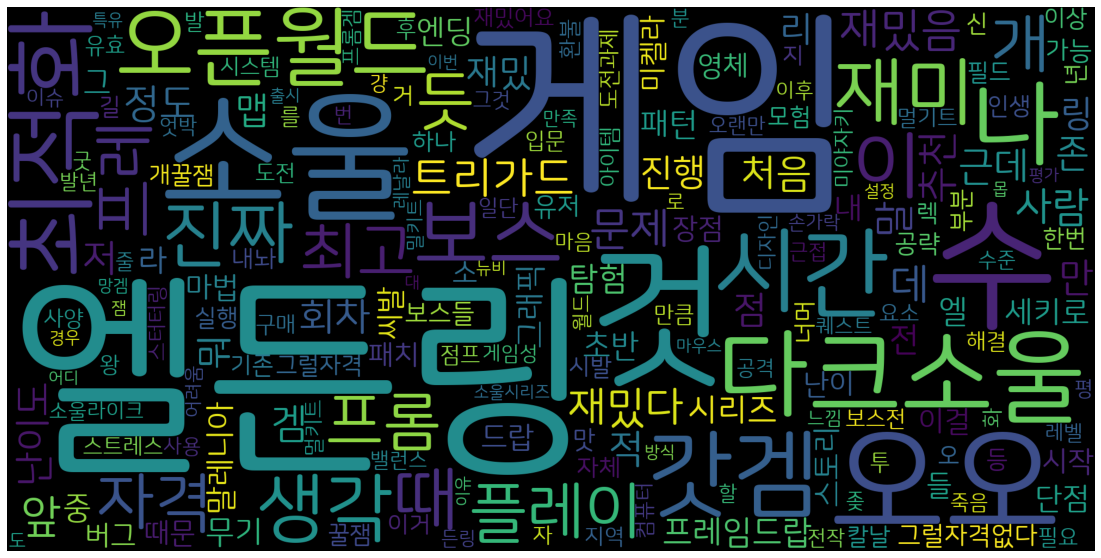

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(
    font_path = 'NanumSquareRoundR.ttf',
    width = 2000,
    height = 1000
).generate_from_frequencies(words)


plt.figure(figsize = (20,10))
plt.imshow(wc)
plt.axis('off')
plt.show()